In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random

receivers_n=4
base_noise_min=-0.005
base_noise_max= 0.005
time=[]
for i in range(-1,1000000):
    time.append(i)           # 1 nano second resolution
ci=0#len(time)//4
cf=len(time)//1

In [2]:
# f = open("G_table.txt", "w")
# for j in range(5,185,5):
#     f.write(str(j/10))
#     f.write(' | ')
#     for i in range(360):
#         f.write(str(math.cos(math.radians(i)))+' ')
#     f.write('\n')
# f.close()    
G_table={}
f = open("G_table.txt", "r")
Lines = f.readlines()
for line in Lines:
    tmp=list(line.split())
    tmp_freq=float(tmp[0])
    tmp=tmp[2:]
    G_table[tmp_freq]=[]
    for i in tmp:
        G_table[tmp_freq].append(float(i))
f.close()

In [3]:
class reciever:
    def __init__(self, id,radar,aircraft):
        global G_table,base_noise_min,base_noise_max,time,receivers_n
        self.id = id                                       # Id of the reciever
        self.pri = radar.pri                               # Pulse Repetition Interval
        self.pwd = radar.pwd                               # Pulse Width
        self.R = math.dist(radar.pos,aircraft.pos)         # Distance between the radar and the aircraft
        self.Pt=radar.Pt                                   # Peak transmitted power
        self.G=radar.G                                     # Antenna Gain
        self.freq = radar.freq                             # carrier frequency
        self.P=(self.Pt*self.G)/(4*math.pi*(self.R**2))    # Power recieved by the aircraft radar reciver
        self.pulse_train=[[],[],[],[]]                     # we are producing the pulse train for the 4 recievers
                                                           # front left, rear left, rear right and front right respectively
                                                           # based on the above information
        angle=math.degrees(math.atan2(radar.pos[1]-aircraft.pos[1],radar.pos[0]-aircraft.pos[0]))-aircraft.heading
        if(angle>360):
            angle-=360                                     # Angle between the aircraft and radar
        if(angle<-360):
            angle+=360
        if(angle>180):
            angle-=360
        if(angle<-180):
            angle+=360
        self.angle=angle
        a=0.1
        omega=2*np.pi*self.freq/2000
        for i in range(-1,len(time)-1):
            if(i%self.pri<=self.pwd):
                if(angle>=-45 and angle<=135):
                    tmp_n=random.uniform(base_noise_min,base_noise_max)
                    self.pulse_train[0].append(tmp_n if abs(self.P*G_table[self.freq][int(angle-45)])<base_noise_max else abs(self.P*G_table[self.freq][int(angle-45)])*(1+a*(np.sin(omega*i)-1)))
                    # self.pulse_train[0].append(tmp_n if abs(self.P*G_table[self.freq][int(angle-45)])<base_noise_max else (abs(self.P*G_table[self.freq][int(angle-45)])+a*(np.sin(np.pi/2)-1)))
                    # self.pulse_train[0].append(abs(self.P*G_table[self.freq][int(angle-45)])*(1+a*(np.sin(omega*i)-1)))
                    # self.pulse_train[0].append(abs(self.P*G_table[self.freq][int(angle-45)]))
                    # self.pulse_train[0].append(abs(self.P*math.cos(math.radians(angle-45))))
                else:
                    self.pulse_train[0].append(random.uniform(base_noise_min,base_noise_max))
                    # self.pulse_train[0].append(0)
                if ((angle>=45 and angle<=180) or (angle>=-180 and angle<=-135)):
                    tmp_n=random.uniform(base_noise_min,base_noise_max)
                    self.pulse_train[1].append(tmp_n if abs(self.P*G_table[self.freq][int(angle-135)])<base_noise_max else (abs(self.P*G_table[self.freq][int(angle-135)])*(1+a*(np.sin(omega*i)-1))))
                    # self.pulse_train[1].append(tmp_n if abs(self.P*G_table[self.freq][int(angle-135)])<base_noise_max else (abs(self.P*G_table[self.freq][int(angle-135)])+a*(np.sin(np.pi/2)-1)))
                    # self.pulse_train[1].append(abs(self.P*G_table[self.freq][int(angle-135)]))
                    # self.pulse_train[1].append(abs(self.P*math.cos(math.radians(angle-135))))
                else:
                    self.pulse_train[1].append(random.uniform(base_noise_min,base_noise_max))
                    # self.pulse_train[1].append(0)
                if ((angle>=135 and angle<=180) or (angle>=-180 and angle<=-45)):
                    tmp_n=random.uniform(base_noise_min,base_noise_max)
                    self.pulse_train[2].append(tmp_n if abs(self.P*G_table[self.freq][int(angle+135)])<base_noise_max else (abs(self.P*G_table[self.freq][int(angle+135)])*(1+a*(np.sin(omega*i)-1))))
                    # self.pulse_train[2].append(tmp_n if abs(self.P*G_table[self.freq][int(angle+135)])<base_noise_max else (abs(self.P*G_table[self.freq][int(angle+135)])+a*(np.sin(np.pi/2)-1)))
                    # self.pulse_train[2].append(abs(self.P*G_table[self.freq][int(angle+135)]))
                    # self.pulse_train[2].append(abs(self.P*math.cos(math.radians(angle+135))))
                else:
                    self.pulse_train[2].append(random.uniform(base_noise_min,base_noise_max))
                    # self.pulse_train[2].append(0)
                if (angle>=-135 and angle<=45):
                    tmp_n=random.uniform(base_noise_min,base_noise_max)
                    self.pulse_train[3].append(tmp_n if abs(self.P*G_table[self.freq][int(angle+45)])<base_noise_max else (abs(self.P*G_table[self.freq][int(angle+45)])*(1+a*(np.sin(omega*i)-1))))
                    # self.pulse_train[3].append(tmp_n if abs(self.P*G_table[self.freq][int(angle+45)])<base_noise_max else (abs(self.P*G_table[self.freq][int(angle+45)])+a*(np.sin(np.pi/2)-1)))
                    # self.pulse_train[3].append(abs(self.P*G_table[self.freq][int(angle+45)]))
                    # self.pulse_train[3].append(abs(self.P*math.cos(math.radians(angle+45))))
                else:
                    self.pulse_train[3].append(random.uniform(base_noise_min,base_noise_max))
                    # self.pulse_train[3].append(0)
            else:
                self.pulse_train[0].append(random.uniform(base_noise_min,base_noise_max))
                self.pulse_train[1].append(random.uniform(base_noise_min,base_noise_max))
                self.pulse_train[2].append(random.uniform(base_noise_min,base_noise_max))
                self.pulse_train[3].append(random.uniform(base_noise_min,base_noise_max))
                # self.pulse_train[0].append(0)
                # self.pulse_train[1].append(0)
                # self.pulse_train[2].append(0)
                # self.pulse_train[3].append(0)
            
class radar:
    def __init__(self, id,pri=500,pwd=10,pos=(0,0)):
        self.id = id                                       # Id of the radar
        self.pri = pri                                     # Pulse Repetition Interval 1 nano seconds
        self.pwd = pwd                                     # Pulse Width in 1 nano seconds
        self.Pt=10                                         # Peak transmitted power
        self.freq=1                                        # frequency range 0.5 to 18 units gigahertz
        self.pos = pos
        self.G=1                                           # Antenna Gain

class aircraft:
    def __init__(self, id,pos=(0,0),heading=0):
        self.id = id                                       # Id of the Aircraft
        self.pos = pos                                     # Position of the radar
        self.heading = heading                             # heading of the Aircraft in degrees

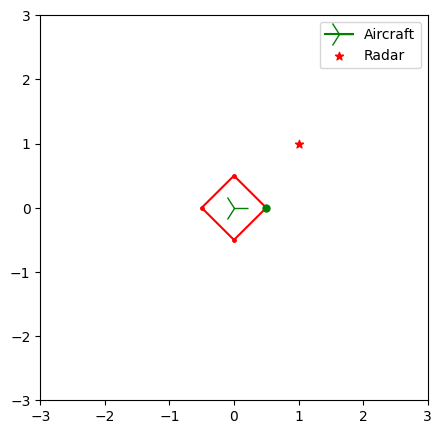

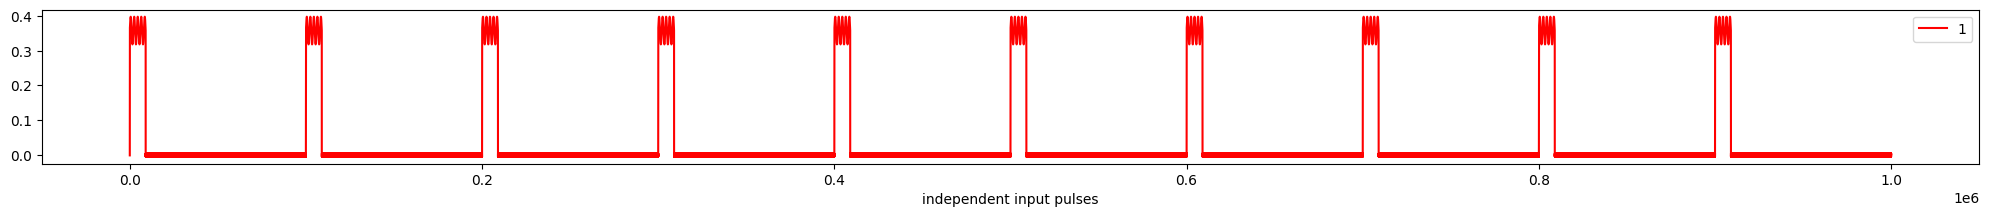

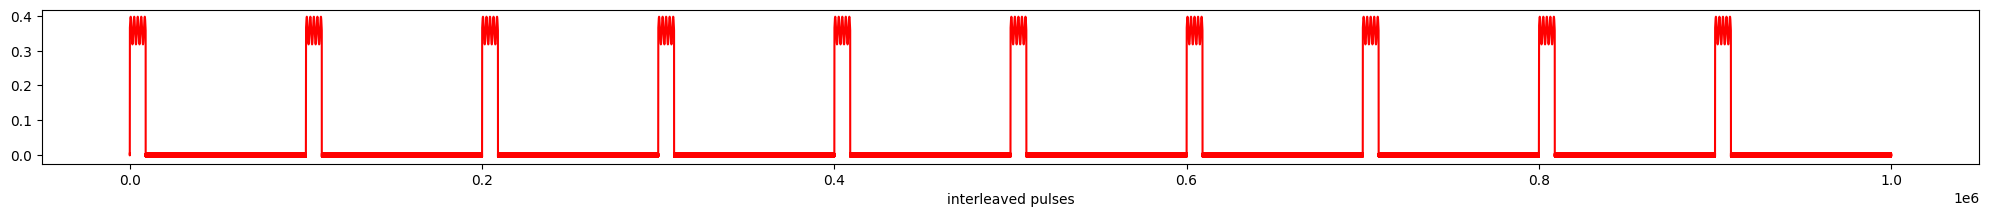

In [6]:
radar_positions = np.array([
    # (0,1),
    # (-1,0),
    # (0,-1),
    # (1,0),
    (1,1),
    # (-1,1),
    # (-1,-1),
    # (1,-1),
])

# radar_positions = np.array([
#     (random.uniform(1,2) if random.uniform(-1,1)>0 else random.uniform(-1,-2),random.uniform(1,2) if random.uniform(-1,1)>0 else random.uniform(-1,-2)),
#     (random.uniform(1,2) if random.uniform(-1,1)>0 else random.uniform(-1,-2),random.uniform(1,2) if random.uniform(-1,1)>0 else random.uniform(-1,-2)),
#     # (random.uniform(1,2) if random.uniform(-1,1)>0 else random.uniform(-1,-2),random.uniform(1,2) if random.uniform(-1,1)>0 else random.uniform(-1,-2)),
#     # (random.uniform(1,2) if random.uniform(-1,1)>0 else random.uniform(-1,-2),random.uniform(1,2) if random.uniform(-1,1)>0 else random.uniform(-1,-2))
# ])

aircraft_0 = aircraft(id=0,pos=(0,0),heading=0)
# aircraft_0 = aircraft(id=0,pos=(random.uniform(-1,1),random.uniform(-1,1)),heading=random.uniform(0,360))

radars=[]
pulses=[[],# Pulse recieved By the front left reciever
        [],# Pulse recieved By the rear left reciever
        [],# Pulse recieved By the rear right reciever
        []]# Pulse recieved By the front right reciever
radar_0 = radar(id=0,pri=100000,pwd=9000,pos=radar_positions[0])
pulse_0 = reciever(id=0,radar=radar_0,aircraft=aircraft_0)
radars.append(radar_0)
pulses[0].append(pulse_0.pulse_train[0])
pulses[1].append(pulse_0.pulse_train[1])
pulses[2].append(pulse_0.pulse_train[2])
pulses[3].append(pulse_0.pulse_train[3])

# radar_1 = radar(id=1,pri=150000,pwd=9000,pos=radar_positions[1])
# pulse_1 = reciever(id=1,radar=radar_1,aircraft=aircraft_0)
# radars.append(radar_1)
# pulses[0].append(pulse_1.pulse_train[0])
# pulses[1].append(pulse_1.pulse_train[1])
# pulses[2].append(pulse_1.pulse_train[2])
# pulses[3].append(pulse_1.pulse_train[3])

plt.figure(figsize=(5 , 5))
plt.plot(aircraft_0.pos[0],aircraft_0.pos[1], color='g', marker = '4', markersize=20,label='Aircraft')
tmp_s=0.5
tmp_x=[aircraft_0.pos[0]+(tmp_s*math.cos(math.radians(aircraft_0.heading))),
       aircraft_0.pos[0]+(tmp_s*math.cos(math.radians(aircraft_0.heading+90))),
       aircraft_0.pos[0]+(tmp_s*math.cos(math.radians(aircraft_0.heading+180))),
       aircraft_0.pos[0]+(tmp_s*math.cos(math.radians(aircraft_0.heading-90))),
       aircraft_0.pos[0]+(tmp_s*math.cos(math.radians(aircraft_0.heading)))]
tmp_y=[aircraft_0.pos[1]+(tmp_s*math.sin(math.radians(aircraft_0.heading))),
       aircraft_0.pos[1]+(tmp_s*math.sin(math.radians(aircraft_0.heading+90))),
       aircraft_0.pos[1]+(tmp_s*math.sin(math.radians(aircraft_0.heading+180))),
       aircraft_0.pos[1]+(tmp_s*math.sin(math.radians(aircraft_0.heading-90))),
       aircraft_0.pos[1]+(tmp_s*math.sin(math.radians(aircraft_0.heading)))]
plt.plot(tmp_x,tmp_y, color='r', marker = '.', markersize=5)
plt.plot(tmp_x[0],tmp_y[0], color='g', marker = '.', markersize=10)
plt.scatter(radar_positions[:,0],radar_positions[:,1], color='r', marker = '*',label='Radar')
plt.legend()
rng=3
plt.xlim([-rng, rng])
plt.ylim([-rng, rng])
plt.show()


pdw(pulses)

In [5]:
def pdw(pulses):    
    global ci,cf
    clrs= 'rgbcmyk'
    fig_x , fig_y = 25 , 2
    plt.figure(figsize=(fig_x , fig_y))
    idx=0
    for i in pulses[0]:
        idx+=1
        plt.plot(time[ci:cf],i[ci:cf], color=clrs[idx-1], label=str(idx))
    plt.legend()
    plt.xlabel("independent input pulses")
    plt.show()

    pulse_f=[[],[],[],[]]
    for i in time:
        max_t=[]
        for j in pulses[0]:
            max_t.append(j[i])
        pulse_f[0].append(max(max_t))
    plt.figure(figsize=(fig_x , fig_y))
    plt.plot(time[ci:cf],pulse_f[0][ci:cf], color='r')
    plt.xlabel("interleaved pulses")
    plt.show()

In [173]:
def deinterleave(pulses):    
    ci=0#len(time)//4
    cf=len(time)//1
    clrs= 'rgbcmyk'
    fig_x , fig_y = 25 , 2
    plt.figure(figsize=(fig_x , fig_y))
    idx=0
    for i in pulses:
        idx+=1
        plt.plot(time[ci:cf],i[ci:cf], color=clrs[idx-1], label=str(idx))
    plt.legend()
    plt.xlabel("independent input pulses")
    plt.show()

    pulse_f=[]
    for i in time:
        max_t=[]
        for j in pulses:
            max_t.append(j[i])
        pulse_f.append(max(max_t))
    plt.figure(figsize=(fig_x , fig_y))
    plt.plot(time[ci:cf],pulse_f[ci:cf], color='r')
    plt.xlabel("interleaved pulses")
    plt.show()